In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import requests

# Data retrieval from API

In [3]:
response = requests.get("http://localhost:8080/api/images/")

In [4]:
print(response.json())

[{'_id': '61a65b9069add03e09e1e7df', 'type': 0, 'evaluations_list': [{'evaluation': 2, 'user_id': '61b710899a6b0a714efdb9f3', '_id': '61b710be9a6b0a714efdba53'}, {'evaluation': 4, 'user_id': '61b7146133437f66228f8efc', '_id': '61b7147233437f66228f8f48'}]}, {'_id': '61a65f2e69add03e09e1e7e1', 'type': 1, 'evaluations_list': [{'evaluation': 7, 'user_id': '61b710899a6b0a714efdb9f3', '_id': '61b710a09a6b0a714efdba17'}, {'evaluation': 4, 'user_id': '61b7146133437f66228f8efc', '_id': '61b7147d33437f66228f8f89'}]}, {'_id': '61a65f3669add03e09e1e7e2', 'type': 1, 'evaluations_list': [{'evaluation': 3, 'user_id': '61b710899a6b0a714efdb9f3', '_id': '61b710d39a6b0a714efdba80'}, {'evaluation': 4, 'user_id': '61b7146133437f66228f8efc', '_id': '61b7147c33437f66228f8f7f'}, {'evaluation': 4, 'user_id': '61b714ad7aaac83cf6d65826', '_id': '61b714b87aaac83cf6d6585e'}]}, {'_id': '61a899b5a99916d2901b7813', 'type': 0, 'evaluations_list': [{'evaluation': 6, 'user_id': '61b710899a6b0a714efdb9f3', '_id': '61b71

In [11]:
# transform data retrieved in pandas dataframe
dataset = pd.DataFrame.from_dict(memory_data)

In [12]:
# manipulate memory dataframe in order to set the right datatype and remove useless fields
memory_data.info()
memory_data['date'] = pd.to_datetime(memory_data['clock'], unit='s', origin='unix').values.astype('<M8[m]')
memory_data['used_memory'] = memory_data['value'].astype(str).astype(int)
del memory_data['value']
del memory_data['clock']
del memory_data['ns']
del memory_data['itemid']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   itemid  11616 non-null  object
 1   clock   11616 non-null  object
 2   value   11616 non-null  object
 3   ns      11616 non-null  object
dtypes: object(4)
memory usage: 363.1+ KB


In [13]:
# show information about the dataframe
memory_data.info()
memory_data['used_memory'].describe()
memory_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         11616 non-null  datetime64[ns]
 1   used_memory  11616 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 181.6 KB


,date,used_memory
0,2021-05-12 13:22:00,883175915520
1,2021-05-12 13:23:00,883197468672
2,2021-05-12 13:24:00,883177095168
3,2021-05-12 13:25:00,883205345280
4,2021-05-12 13:26:00,883214475264
...,...,...
11611,2021-05-20 14:53:00,719448907776
11612,2021-05-20 14:54:00,719447781376
11613,2021-05-20 14:55:00,719445721088
11614,2021-05-20 14:56:00,719445614592


In [14]:
# manipulate 15m avg load dataframe in order to set the right datatype and remove useless fields
load_data_15m.info()
load_data_15m['date'] = pd.to_datetime(load_data_15m['clock'], unit='s', origin='unix').values.astype('<M8[m]')
load_data_15m['load15m'] = load_data_15m['value'].astype(str).astype(float)
del load_data_15m['value']
del load_data_15m['clock']
del load_data_15m['ns']
del load_data_15m['itemid']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   itemid  8938 non-null   object
 1   clock   8938 non-null   object
 2   value   8938 non-null   object
 3   ns      8938 non-null   object
dtypes: object(4)
memory usage: 279.4+ KB


In [15]:
# manipulate 5m avg load dataframe in order to set the right datatype and remove useless fields
load_data_5m.info()
load_data_5m['date'] = pd.to_datetime(load_data_5m['clock'], unit='s', origin='unix').values.astype('<M8[m]')
load_data_5m['load5m'] = load_data_5m['value'].astype(str).astype(float)
del load_data_5m['value']
del load_data_5m['clock']
del load_data_5m['ns']
del load_data_5m['itemid']
load_data_5m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8937 entries, 0 to 8936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   itemid  8937 non-null   object
 1   clock   8937 non-null   object
 2   value   8937 non-null   object
 3   ns      8937 non-null   object
dtypes: object(4)
memory usage: 279.4+ KB


,date,load5m
0,2021-05-14 10:01:00,0.040000
1,2021-05-14 10:02:00,0.033333
2,2021-05-14 10:03:00,0.030000
3,2021-05-14 10:04:00,0.026667
4,2021-05-14 10:05:00,0.020000
...,...,...
8932,2021-05-20 14:53:00,0.026667
8933,2021-05-20 14:54:00,0.053333
8934,2021-05-20 14:55:00,0.066667
8935,2021-05-20 14:56:00,0.053333


In [16]:
# manipulate 1m avg load dataframe in order to set the right datatype and remove useless fields
load_data_1m.info()
load_data_1m['date'] = pd.to_datetime(load_data_1m['clock'], unit='s', origin='unix').values.astype('<M8[m]')
load_data_1m['load1m'] = load_data_1m['value'].astype(str).astype(float)
del load_data_1m['value']
del load_data_1m['clock']
del load_data_1m['ns']
del load_data_1m['itemid']
load_data_1m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8937 entries, 0 to 8936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   itemid  8937 non-null   object
 1   clock   8937 non-null   object
 2   value   8937 non-null   object
 3   ns      8937 non-null   object
dtypes: object(4)
memory usage: 279.4+ KB


,date,load1m
0,2021-05-14 10:01:00,0.006667
1,2021-05-14 10:02:00,0.003333
2,2021-05-14 10:03:00,0.000000
3,2021-05-14 10:04:00,0.000000
4,2021-05-14 10:05:00,0.000000
...,...,...
8932,2021-05-20 14:53:00,0.026667
8933,2021-05-20 14:54:00,0.120000
8934,2021-05-20 14:55:00,0.103333
8935,2021-05-20 14:56:00,0.040000


In [17]:
# manipulate disk usage dataframe in order to set the right datatype and remove useless fields
disk_usage.info()
disk_usage['date'] = pd.to_datetime(disk_usage['clock'], unit='s', origin='unix').values.astype('<M8[m]')
disk_usage['disk_usage'] = disk_usage['value'].astype(str).astype(float)
del disk_usage['value']
del disk_usage['clock']
del disk_usage['ns']
del disk_usage['itemid']
disk_usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   itemid  1159 non-null   object
 1   clock   1159 non-null   object
 2   value   1159 non-null   object
 3   ns      1159 non-null   object
dtypes: object(4)
memory usage: 36.3+ KB


,date,disk_usage
0,2021-05-19 19:39:00,0.000000
1,2021-05-19 19:40:00,0.043791
2,2021-05-19 19:41:00,0.077020
3,2021-05-19 19:42:00,0.075370
4,2021-05-19 19:43:00,0.000000
...,...,...
1154,2021-05-20 14:53:00,0.164564
1155,2021-05-20 14:54:00,0.021048
1156,2021-05-20 14:55:00,0.028738
1157,2021-05-20 14:56:00,0.000000


In [18]:
# creation of a list of all dataframe 
items_list = [memory_data, disk_usage, load_data_15m, load_data_5m, load_data_1m]

In [19]:
# join the list dataframe on the field date to create a single dataframe
items = reduce(lambda left,right: pd.merge(left,right,on='date'), items_list)
items

,date,used_memory,disk_usage,load15m,load5m,load1m
0,2021-05-19 19:39:00,717970493440,0.000000,0.073333,0.040000,0.006667
1,2021-05-19 19:40:00,717967278080,0.043791,0.073333,0.033333,0.003333
2,2021-05-19 19:41:00,717970440192,0.077020,0.070000,0.030000,0.000000
3,2021-05-19 19:42:00,717968330752,0.075370,0.070000,0.023333,0.000000
4,2021-05-19 19:43:00,717968461824,0.000000,0.076667,0.046667,0.100000
...,...,...,...,...,...,...
1154,2021-05-20 14:53:00,719448907776,0.164564,0.070000,0.026667,0.026667
1155,2021-05-20 14:54:00,719447781376,0.021048,0.076667,0.053333,0.120000
1156,2021-05-20 14:55:00,719445721088,0.028738,0.080000,0.066667,0.103333
1157,2021-05-20 14:56:00,719445614592,0.000000,0.076667,0.053333,0.040000


# Time-Series visualization

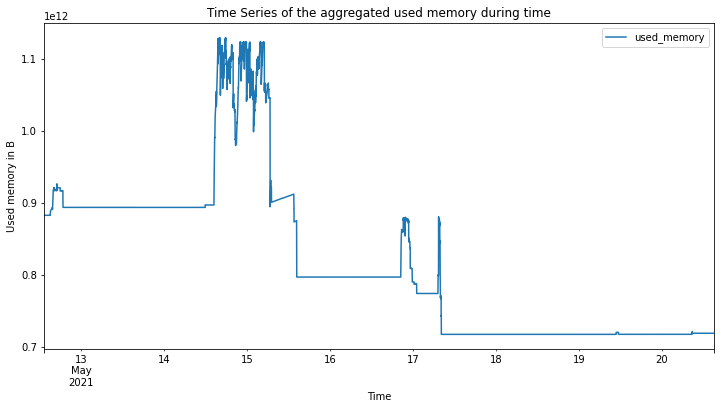

In [20]:
# display the time-series for the used memory
memory_data.plot(x='date', y='used_memory', figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Used memory in B')
plt.title('Time Series of the aggregated used memory during time');

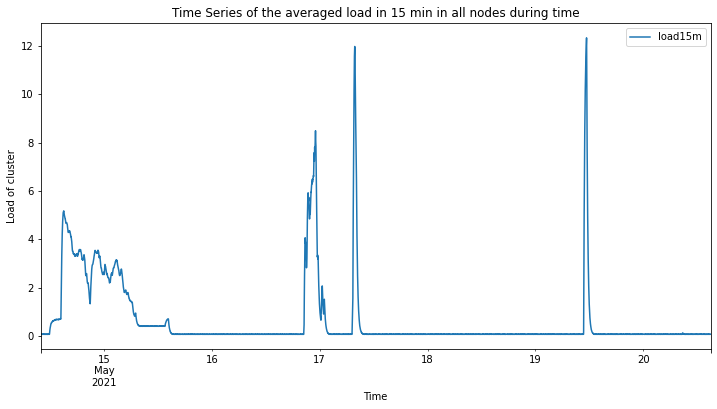

In [21]:
# display the time-series for the 15m avg load
load_data_15m.plot(x='date', y='load15m', figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Load of cluster')
plt.title('Time Series of the averaged load in 15 min in all nodes during time');

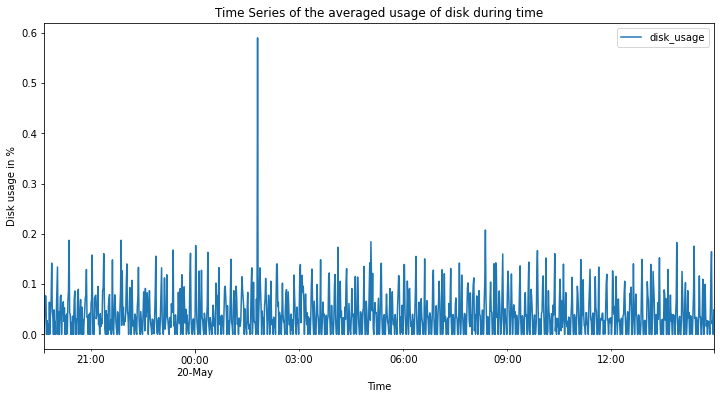

In [22]:
# display the time-series for the average disk usage
disk_usage.plot(x='date', y='disk_usage', figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Disk usage in %')
plt.title('Time Series of the averaged usage of disk during time');

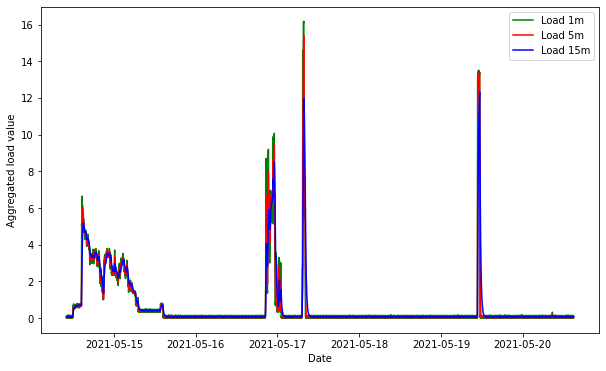

In [23]:
# display a comparison of the time-series for avg load (15m,5m and 1m)
# Note: as can be seen the 3 graphs are very similar
load_data_15m = load_data_15m.sort_values('date')
load_data_5m = load_data_5m.sort_values('date')
load_data_1m = load_data_1m.sort_values('date')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(load_data_1m['date'], load_data_1m['load1m'], color='green', label='Load 1m')
ax.plot(load_data_5m['date'], load_data_5m['load5m'], color='red', label='Load 5m')
ax.plot(load_data_15m['date'], load_data_15m['load15m'], color='blue', label='Load 15m')
plt.xlabel('Date')
plt.ylabel('Aggregated load value')
plt.legend()
plt.show();

# Pre-processing and Dimensionality Reduction 

In [24]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

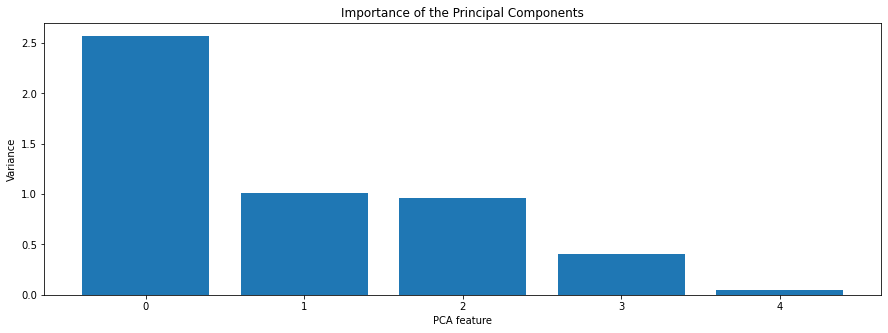

In [25]:
# Get the name of all column containing the data to use in the model
# and calculate PCA in order to get the importance of principal component
# after the normalization of the data

df_col = items.drop(['date'], axis = 1)
names=df_col.columns
X = items[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plot the principal components and their variance 
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components")
plt.show()

In [26]:
# Calculate PCA with 3 components
# As can be seen of the graph above component 0, 1 and 2
# explain almost alla the variance 

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2', 'pc3'])
principalDf

,pc1,pc2,pc3
0,-5.036008e+08,-0.022995,-0.044411
1,-5.068161e+08,-0.031943,-0.001285
2,-5.036540e+08,-0.039327,0.031393
3,-5.057634e+08,-0.040959,0.029555
4,-5.056324e+08,0.068264,-0.036167
...,...,...,...
1154,9.748136e+08,-0.032146,0.122327
1155,9.736872e+08,0.077816,-0.011736
1156,9.716269e+08,0.065049,-0.005094
1157,9.715204e+08,0.003294,-0.039573


# Modeling

## Clustering-Based Anomaly Detection

In [27]:
from sklearn.cluster import KMeans

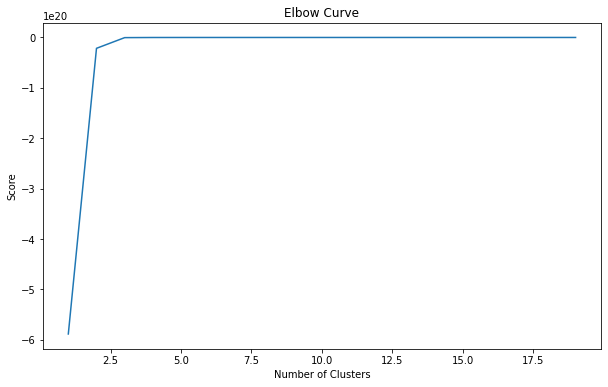

In [28]:
# Usage of elbow method to identify the correct number of cluster to use in K-Means 
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(principalDf.values) for i in n_cluster]
scores = [kmeans[i].score(principalDf.values) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [29]:
# function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [30]:
# train the k-means model with the data e calculate the various cluster
# based on the graph above set the number of cluster to 4

''' k-means is a widely used clustering algorithm
    It creates ‘k’ similar clusters of data points. 
    Data instances that fall outside of these groups 
    could potentially be marked as anomalies.
    The underline assumption in the clustering based anomaly detection is that 
    if we cluster the data, normal data will belong to clusters while anomalies 
    will not belong to any clusters or belong to small clusters. '''

# train Kmeans model with the 3 pca component found 
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

# set the proportion of the outliers present in our data set
outliers_fraction = 0.03 
# get the distance between each point and its nearest centroid
# the biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomalyKmeans contain the anomaly result of obtained from the above method (0:normal, 1:anomaly) 
items['anomalyKmeans'] = (distance >= threshold).astype(int)



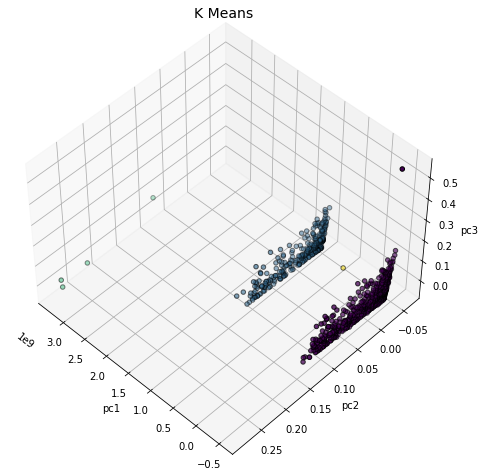

In [31]:
# plotting the distribution of principal data grouped by the number of cluster chosen 
fig = plt.figure(1, figsize=(10,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(principalDf['pc1'], principalDf['pc2'], principalDf['pc3'],
          c=labels.astype(float), edgecolor="k")
ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")
plt.title("K Means", fontsize=14);

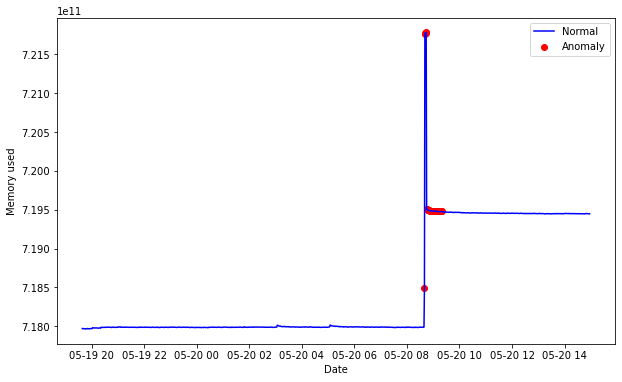

In [32]:
# visualize anomalies in the time series of used memory
items = items.sort_values('date')
fig, ax = plt.subplots(figsize=(10,6))
# anomaly in used memory with K-means
a = items.loc[items['anomalyKmeans'] == 1, ['date', 'used_memory']] 

# plotting the results
ax.plot(items['date'], items['used_memory'], color='blue', label='Normal')
ax.scatter(a['date'],a['used_memory'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Memory used')
plt.legend()
plt.show();

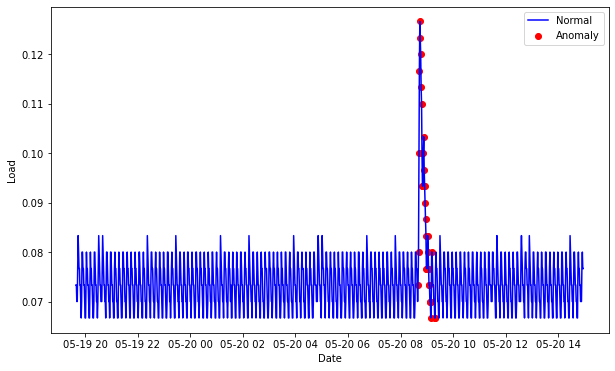

In [33]:
# visualize anomalies in the time series of 15m load
items = items.sort_values('date')
fig, ax = plt.subplots(figsize=(10,6))
# anomaly in used memory with K-means
a = items.loc[items['anomalyKmeans'] == 1, ['date', 'load15m']] #anomaly

# plotting the results
ax.plot(items['date'], items['load15m'], color='blue', label='Normal')
ax.scatter(a['date'],a['load15m'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Load')
plt.legend()
plt.show();

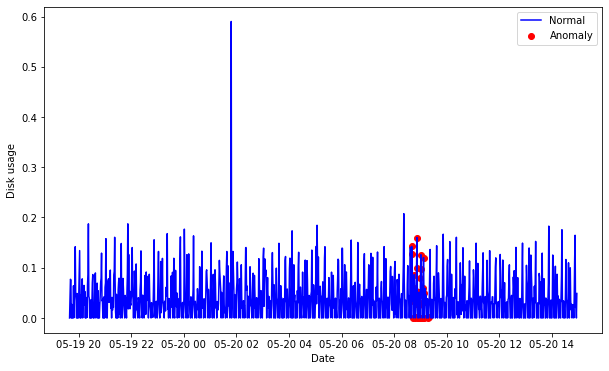

In [34]:
# visualize anomalies in the time series of disk usage 
items = items.sort_values('date')
fig, ax = plt.subplots(figsize=(10,6))
# anomaly in used memory with K-means
a = items.loc[items['anomalyKmeans'] == 1, ['date', 'disk_usage']] 

# plotting the results
ax.plot(items['date'], items['disk_usage'], color='blue', label='Normal')
ax.scatter(a['date'],a['disk_usage'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Disk usage')
plt.legend()
plt.show();

## Support Vector Machine-Based Anomaly Detection

In [35]:
from sklearn.svm import OneClassSVM

In [36]:
'''OneClassSVM can be used to identify anomalies as an unsupervised problems 
   that learns a decision function for anomaly detection: classifying new data 
   as similar or different to the training set.
   The idea of SVM for anomaly detection is to find a function that is positive 
   for regions with high density of points, and negative for small densities.'''

# normalize data 
data = items[['used_memory','load15m','load5m','load1m', 'disk_usage']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# set the proportion of the outliers present in our data set
outliers_fraction = 0.03
# train oneclassSVM on normalized data
# usage of rbf as kernel for non linear data
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)
model.fit(data)
# calculate the predictions
# anomalySVM contain the anomaly result of obtained from the above method (+1:normal, -1:anomaly) 
items['anomalySVM'] = pd.Series(model.predict(data))

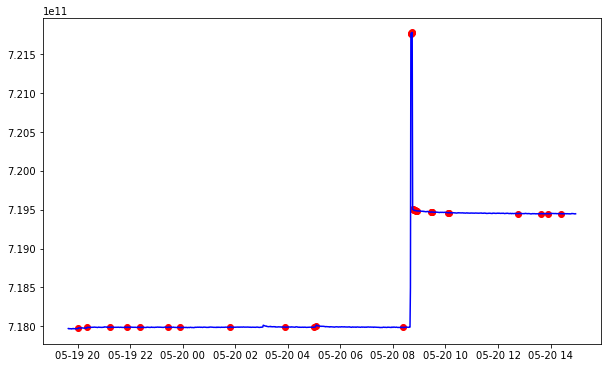

In [37]:
# visualize anomalies in the time series of used memory
fig, ax = plt.subplots(figsize=(10,6))
# anomaly calculation
a = items.loc[items['anomalySVM'] == -1, ['date', 'used_memory']] 

# plotting the results
ax.plot(items['date'], items['used_memory'], color='blue')
ax.scatter(a['date'],a['used_memory'], color='red')
plt.show();

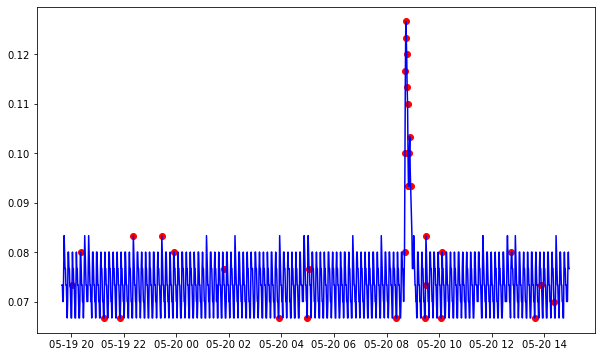

In [38]:
# visualize anomalies in the time series of 15m load
fig, ax = plt.subplots(figsize=(10,6))
# anomaly calculation
a = items.loc[items['anomalySVM'] == -1, ['date', 'load15m']] 

# plotting the results
ax.plot(items['date'], items['load15m'], color='blue')
ax.scatter(a['date'],a['load15m'], color='red')
plt.show();

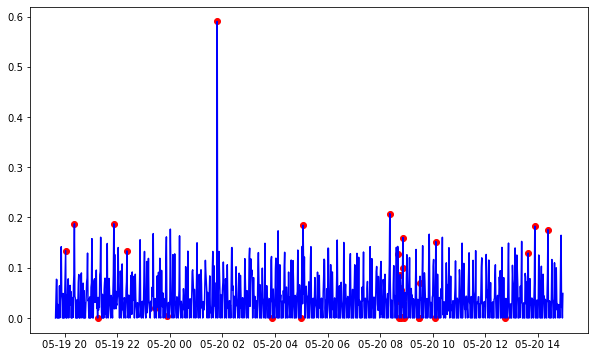

In [39]:
# visualize anomalies in the time series of disk usage 
fig, ax = plt.subplots(figsize=(10,6))
# anomaly calculation
a = items.loc[items['anomalySVM'] == -1, ['date', 'disk_usage']] 

# plotting the results
ax.plot(items['date'], items['disk_usage'], color='blue')
ax.scatter(a['date'],a['disk_usage'], color='red')
plt.show();

## Isolation Forests For Anomaly Detection

In [40]:
from sklearn.ensemble import IsolationForest

In [41]:
''' Isolation Forest detects anomalies purely based on the fact that anomalies
    are data points that are few and different. The anomalies isolation is 
    implemented without employing any distance or density measure. This method 
    is fundamentally different from clustering based or distance based algorithms.'''

# set the proportion of the outliers present in our data set
outliers_fraction = 0.03
# train the model 
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values)

# calculate the predictions
# anomalyIsolationForests contain the anomaly result of obtained from the above method (+1:normal, -1:anomaly) 
items['anomalyIsolationForests'] = pd.Series(model.predict(principalDf.values))

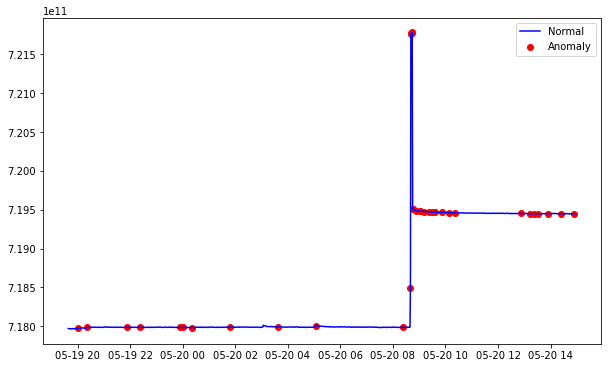

In [42]:
# visualize anomalies in the time series of used memory
fig, ax = plt.subplots(figsize=(10,6))
# anomaly calculation
a = items.loc[items['anomalyIsolationForests'] == -1, ['date', 'used_memory']]

# plotting the results
ax.plot(items['date'], items['used_memory'], color='blue', label = 'Normal')
ax.scatter(a['date'],a['used_memory'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

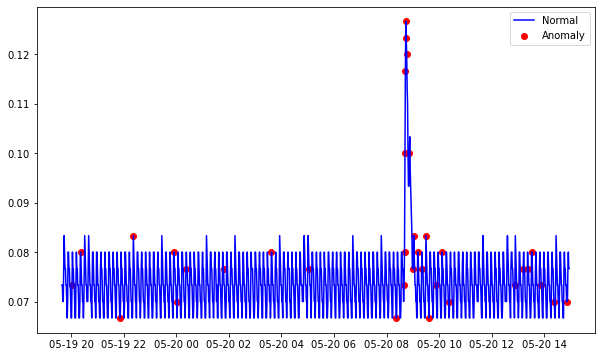

In [43]:
# visualize anomalies in the time series of 15m load
fig, ax = plt.subplots(figsize=(10,6))
# anomaly calculation
a = items.loc[items['anomalyIsolationForests'] == -1, ['date', 'load15m']] #anomaly

# plotting the results
ax.plot(items['date'], items['load15m'], color='blue', label = 'Normal')
ax.scatter(a['date'],a['load15m'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

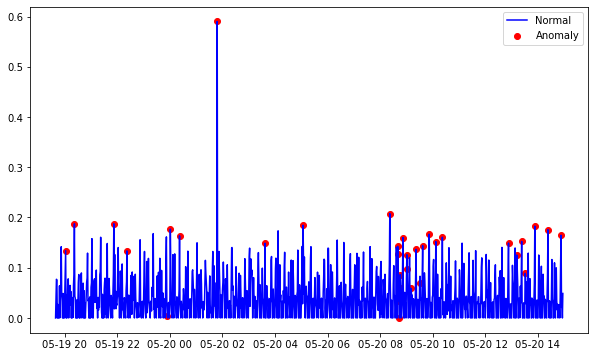

In [44]:
# visualize anomalies in the time series of disk usage 
fig, ax = plt.subplots(figsize=(10,6))
# anomaly calculation
a = items.loc[items['anomalyIsolationForests'] == -1, ['date', 'disk_usage']] #anomaly

# plotting the results
ax.plot(items['date'], items['disk_usage'], color='blue', label = 'Normal')
ax.scatter(a['date'],a['disk_usage'], color='red', label = 'Anomaly')
plt.legend()
plt.show();